# 1.1 . Traitement des images. Approche SIFT.


## Import du dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from os import listdir

!{sys.executable} -m pip install opencv-python



In [ ]:
import pandas as pd
!pwd
nom_source = "/Users/ilaria/Jottacloud/lavoro/priorita-progetti/" \
             "alta_priorita/openclassrooms/FOAD Data Scientist/P6/" \
             "testo/data/source/Flipkart/flipkart_com-ecommerce_sample_1050.csv"
df = pd.read_csv(nom_source, sep= ',', low_memory=False )# Préparation du dataset
df.shape

# List photos 1
path = "/Users/ilaria/Jottacloud/lavoro/priorita-progetti/" \
             "alta_priorita/openclassrooms/FOAD Data Scientist/P6/testo/data/source/Flipkart/Images/"

# list_photos = [file for file in listdir(path)]
# print(len(list_photos))

display(df.head())
# List photos 2
list_photos = df['image'].to_list()
print(list_photos)



/Users/ilaria/Jottacloud/lavoro/priorita-progetti/alta_priorita/openclassrooms/FOAD Data Scientist/P6/immagini/webinar


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


['55b85ea15a1536d46b7190ad6fff8ce7.jpg', '7b72c92c2f6c40268628ec5f14c6d590.jpg', '64d5d4a258243731dc7bbb1eef49ad74.jpg', 'd4684dcdc759dd9cdf41504698d737d8.jpg', '6325b6870c54cd47be6ebfbffa620ec7.jpg', '893aa5ed55f7cff2eccea7758d7a86bd.jpg', 'f355cc1ccb08bd0d283ed979b7ee7515.jpg', 'dd0e3470a7e6ed76fd69c2da27721041.jpg', '41384da51732c0b4df3de8f395714fbb.jpg', '710ed5f2393a4b9e8823aa0029f71f93.jpg', '920154acbe49d3202ed7d2ed2df1ea13.jpg', '08452abdadb3db1e686b94a9c52fc7b6.jpg', '1e8741b5ae27a513546c94b3f3312aee.jpg', '189fa66a5fa6f08d2802a62ecf0be298.jpg', 'bbb8cdc5406ff60ff06ff64630f2ca47.jpg', '1120bc768623572513df956172ffefeb.jpg', '5479bb7028827d60000720a2c135976a.jpg', '733aa1e801a139fa8dc7be9f0eff5ee0.jpg', '62c35de4df27437d3597963fac55a8b6.jpg', '33d97d63c037078cd3f08033966d6a88.jpg', 'd7ca2b06b4f4d3b98c61c377b18a2d6b.jpg', 'f74476ba64365d97a5be7d375cbf4c7a.jpg', 'fda50982a672ef8835de5c1cc86f8bfc.jpg', '4788f5466992da09024b8ffcc8a5cba4.jpg', '653826cd53f1d9e2c086c0ac7846ef70.jpg',

## Catégories

In [ ]:
list_labels = ['Baby Care ', 'Beauty and Personal Care ', 'Computers ', 'Home Decor & Festive Needs ',
               'Home Furnishing ', 'Kitchen & Dining ', 'Watches ']

# df['first_category'] = df['product_category_tree'].str.extract(r'\[\"(\w* \w*)')
df['first_category'] = df['product_category_tree'].str.extract(r'^\[\"(.+?)[\>\>]')


## Détermination et affichage des descripteurs SIFT

* L'image contient 319 descripteurs
* Chaque descripteur est un vecteur de longueur 128

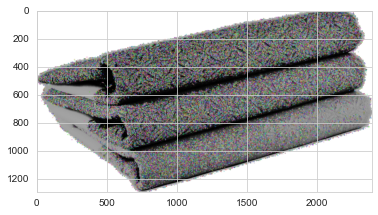

Descripteurs :  (47651, 128)

[[ 85. 113.  31. ...   0.   0.   0.]
 [ 29.  80.  73. ...   0.   0.   0.]
 [ 10.  67. 115. ...   0.   0.  22.]
 ...
 [  0.   0.   0. ...   0.   0.  13.]
 [ 40.   0.   0. ...   0.   0.  51.]
 [ 37.   1.   0. ...   0.   0.   0.]]


In [ ]:
import cv2

# sift = cv2.xfeatures2d.SIFT_create()
sift = cv2.SIFT_create()
image = cv2.imread(path+list_photos[1],0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
img=cv2.drawKeypoints(image,kp,image)
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)


# Pré-traitement des images via SIFT

## Créations des descripteurs de chaque image
* Pour chaque image passage en gris et equalisation
* création d'une liste de descripteurs par image ("sift_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image
* création d'une liste de descripteurs pour l'ensemble des images ("sift_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs

In [ ]:
# identification of key points and associated descriptors
import time, cv2
sift_keypoints = []
temps1=time.time()
sift = cv2.SIFT_create(500)

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path+list_photos[image_num],0) # convert in gray
    # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    res = cv2.equalizeHist(image)   # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000


/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)



Nombre de descripteurs :  (517351, 128)
temps de traitement SIFT descriptor :           862.36 secondes


## Création des clusters de descripteurs
* Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [ ]:
from sklearn import cluster, metrics

# Determination number of clusters
temps1=time.time()

# k = int(round(np.sqrt(len(sift_keypoints_all)),0)) # approche 1
k = 70

print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  70
Création de 70 clusters de descripteurs ...
temps de traitement kmeans :            25.95 secondes


## Création des features des images
* Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

Features d'une image = Histogramme d'une image = Comptage pour une image du nombre de descripteurs par cluster

In [ ]:
# Creation of histograms (features)
temps1=time.time()

def build_histogram(kmeans, des, image_num):
    res = kmeans.predict(des)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_des=len(des)
    if nb_des==0 : print("problème histogramme image  : ", image_num)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist


# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")


0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             2.53 secondes


## Réductions de dimension

### Réduction de dimension PCA
* La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
* L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [ ]:
from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 70)
Dimensions dataset après réduction PCA :  (1050, 54)


### Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [ ]:
from sklearn import manifold, decomposition

tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = df['first_category']
print(df_tsne.shape)
df_tsne.head()

(1050, 3)


,tsne1,tsne2,class
0,31.215652,-4.410825,Home Furnishing
1,-1.177738,34.027016,Baby Care
2,29.555445,13.045231,Baby Care
3,-5.860289,43.923363,Home Furnishing
4,7.617673,35.249916,Home Furnishing


## Analyse visuelle : affichage T-SNE selon catégories d'images

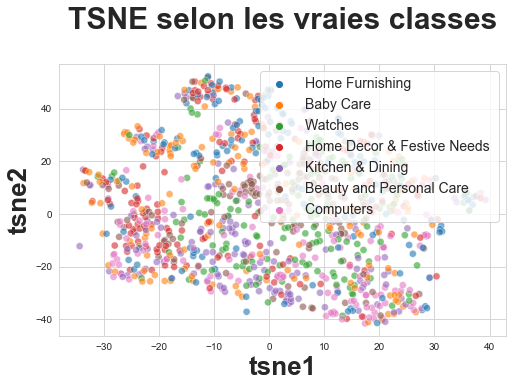

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()


## Analyse mesures : similarité entre catégories et clusters

###  Création de clusters à partir du T-SNE

In [ ]:
from sklearn import cluster, metrics

cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)
df_tsne.head()


(1050, 4)


,tsne1,tsne2,class,cluster
0,31.215652,-4.410825,Home Furnishing,0
1,-1.177738,34.027016,Baby Care,2
2,29.555445,13.045231,Baby Care,0
3,-5.860289,43.923363,Home Furnishing,2
4,7.617673,35.249916,Home Furnishing,2


###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters

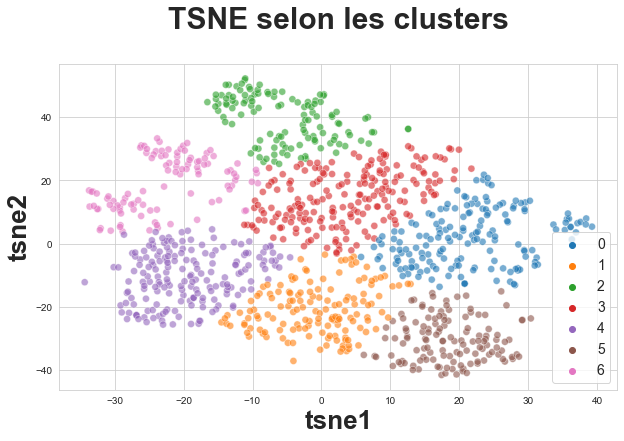

ARI :  0.049731655316736595


In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = df['first_category']
# labels = df['cluster']

ind_labels = []
for i in labels:
    ind_labels.append(list_labels.index(i))

print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))
# print("ARI : ", metrics.adjusted_rand_score(ind_labels, cls.labels_)) #ARI :  0.000366822595701163

### Analyse par classes

In [ ]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    169
1    146
2    120
3    202
4    182
5    128
6    103
Name: class, dtype: int64

In [ ]:
# print(labels)

# print(len(ind_labels))
# print(ind_labels)
print(cls.labels_)
# conf_mat = metrics.confusion_matrix(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(ind_labels, cls.labels_)
print(conf_mat)

[0 2 0 ... 6 5 2]
[[28 13 18 17 25 17 32]
 [25 13  7 71 19 10  5]
 [26 24  5 12 31 44  8]
 [17 12 30 21 42  7 21]
 [30  8 46 19 16 13 18]
 [12 43 10 19 36 19 11]
 [31 33  4 43 13 18  8]]


In [ ]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    # corresp = np.argmax(conf_mat, axis=0)
    corresp = [6, 5, 4, 3, 1, 2, 0]
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

cls_labels_transform = conf_mat_transform(ind_labels, cls.labels_)
conf_mat = metrics.confusion_matrix(ind_labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(ind_labels, cls_labels_transform))

Correspondance des clusters :  [6, 5, 4, 3, 1, 2, 0]
[[32 25 17 17 18 13 28]
 [ 5 19 10 71  7 13 25]
 [ 8 31 44 12  5 24 26]
 [21 42  7 21 30 12 17]
 [18 16 13 19 46  8 30]
 [11 36 19 19 10 43 12]
 [ 8 13 18 43  4 33 31]]

              precision    recall  f1-score   support

           0       0.31      0.21      0.25       150
           1       0.10      0.13      0.11       150
           2       0.34      0.29      0.32       150
           3       0.10      0.14      0.12       150
           4       0.38      0.31      0.34       150
           5       0.29      0.29      0.29       150
           6       0.18      0.21      0.19       150

    accuracy                           0.22      1050
   macro avg       0.25      0.22      0.23      1050
weighted avg       0.25      0.22      0.23      1050



<AxesSubplot:>

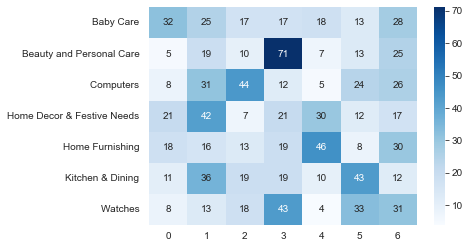

In [ ]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

# 1.2 . Traitement des images. Approche CNN, VGG-16, sur la base des notions du cours ""


In [ ]:
stop

NameError: name 'stop' is not defined